In [5]:
# Module Import
import deep_neural_network.deep_nn as nn
import dropout_and_regularization as dr

# Package Import 
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio
import pandas as pd


plt.tight_layout()

<Figure size 432x288 with 0 Axes>

#   Loading Data

In [28]:
def load_dataset():
    path = os.path.join(os.getcwd(), 'data', 'data.mat')
    data = sio.loadmat(path)

    x_train = pd.DataFrame(
        data['X'],
        columns = ['x1','x2']
    )

    y_train= data['y'].T

    x_test = data['Xval'].T

    y_test = data['yval'].T

    return x_train, y_train , x_test, y_test

In [29]:
x_train, y_train, x_test, y_test = load_dataset()

## Stats about Data

In [30]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      211 non-null    float64
 1   x2      211 non-null    float64
dtypes: float64(2)
memory usage: 3.4 KB


In [31]:
x_train.describe()

,x1,x2
count,211.000000,211.000000
mean,-0.130246,-0.059743
std,0.200516,0.314751
min,-0.596774,-0.657895
25%,-0.287903,-0.313889
50%,-0.130300,-0.052924
75%,0.013825,0.192690
max,0.297235,0.573392


array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>]], dtype=object)

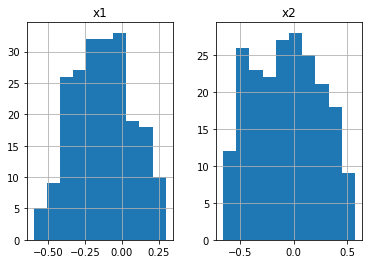

In [32]:
x_train.hist()

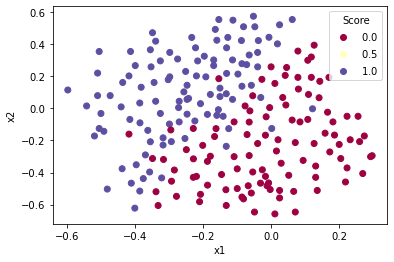

In [33]:
data_plot = plt.scatter(
    x_train['x1'],
    x_train['x2'],
    c = y_train,
    cmap = plt.cm.Spectral,
)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(*data_plot.legend_elements(num = 2), loc = 'upper right', title = 'Score')




plt.show()

In [34]:
x_train = x_train.to_numpy().T

## Models

In [35]:
def non_regularized_model(x, y, learning_rate = 0.3, num_iterations = 30000, print_cost = True):
    grads = {}
    costs = []
    m = x.shape[1]
    layer_dims = [x.shape[0], 20, 3,1]
    non_regularized_aL = []

    parameters = nn.initialize_paraeters_deep(layer_dims)

    for i in range(num_iterations):
        aL, caches = nn.L_model_forward(x, parameters)
        cost = nn.cross_entropy_cost(aL,y)
        grads = nn.L_model_backward(aL, y , caches)
        parameters = nn.update_parameters(parameters, grads, learning_rate)

        if i%100 == 0:
            non_regularized_aL.append(aL)

        if i % 1000 == 0:
            costs.append(cost)
            if i % 5000 == 0:
                if print_cost:
                    print(f'Cost after iteration {i} is {cost}')


    plt.plot(costs)
    plt.ylabel("Cost")
    plt.xlabel("iteration (x1000)")
    plt.title(f"Learning rate : {learning_rate}")
    plt.show()

    return parameters, non_regularized_aL

Cost after iteration 0 is 0.6060964880245826
Cost after iteration 5000 is 0.17543669167304096
Cost after iteration 10000 is 0.1615262477846984
Cost after iteration 15000 is 0.15112057543976545
Cost after iteration 20000 is 0.1430166619457436
Cost after iteration 25000 is 0.13900186948511392


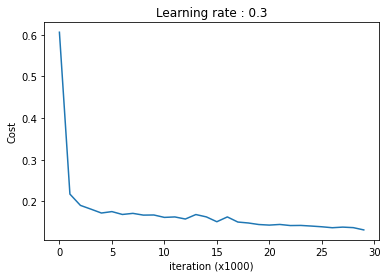

Accuracy (1st method) = 94.31279620853081
Accuracy (2nd method) =94.3127962085308 
Accuracy (1st method) = 94.0
Accuracy (2nd method) =94.0 


In [63]:
non_regularized_parameters, non_regularized_aL = non_regularized_model(x_train, y_train)
_ = nn.predict(x_train, y_train, non_regularized_parameters)
_ = nn.predict(x_test, y_test, non_regularized_parameters)

In [37]:
def regularized_model(x, y, lambda_var = 0.7, learning_rate = 0.3, numm_iterations = 30000, print_cost = True):
    grads = {}
    costs = []
    m = x.shape[1]
    layer_dims = [x.shape[0], 20, 3,1]

    regularized_aL = []

    parameters = nn.initialize_paraeters_deep(layer_dims)

    for i in range(numm_iterations):
        aL, caches = nn.L_model_forward(x, parameters)
        cost = dr.cost_with_regulariztion(aL, y , parameters, lambda_var)
        grads = dr.L_model_backward_with_regulariztion(aL, y , caches, lambda_var)
        parameters = nn.update_parameters(parameters, grads, learning_rate)

        if i%100 == 0:
            regularized_aL.append(aL)

        if i % 1000 == 0:
            costs.append(cost)
            if i % 5000 == 0:
                if print_cost:
                    print(f'Cost after iteration {i} is {cost}')


    plt.plot(costs)
    plt.ylabel("Cost")
    plt.xlabel("iteration (x1000)")
    plt.title(f"Learning rate : {learning_rate}")
    plt.show()

    return parameters, regularized_aL

Cost after iteration 0 is 0.6895108819546352
Cost after iteration 5000 is 0.2666338561005501
Cost after iteration 10000 is 0.2650753338800886
Cost after iteration 15000 is 0.26511931747113077
Cost after iteration 20000 is 0.2649092814689828
Cost after iteration 25000 is 0.26483522785017644


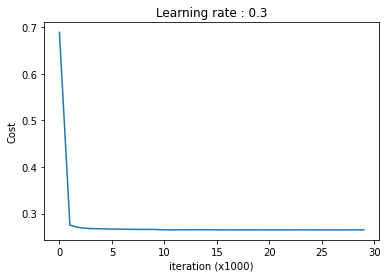

Accuracy (1st method) = 93.36492890995261
Accuracy (2nd method) =93.36492890995261 
Accuracy (1st method) = 92.5
Accuracy (2nd method) =92.5 


In [62]:
regularized_parameters , regularized_aL= regularized_model(x_train, y_train)
_ = nn.predict(x_train, y_train, regularized_parameters)
_ = nn.predict(x_test, y_test, regularized_parameters)


In [39]:
def dropout_model(x, y,keep_probs = 0.86, learning_rate = 0.3, numm_iterations = 1500, print_cost = True):
    # 14% neurons will be dropped
    grads = {}
    costs = []
    m = x.shape[1]
    layer_dims = [x.shape[0], 20, 3,1]

    parameters = nn.initialize_paraeters_deep(layer_dims)
    dropout_aL = []

    for i in range(numm_iterations):
        aL, caches, d_list = dr.L_model_forward_with_dropout(x, parameters ,keep_probs)
        cost = nn.cross_entropy_cost(aL, y)
        grads = dr.L_model_backward_with_dropout(aL, y , caches, d_list, keep_probs)
        parameters = nn.update_parameters(parameters, grads, learning_rate)

        if i % 100 == 0:
            costs.append(cost)
            dropout_aL.append(aL)
            if i % 500 == 0:
                if print_cost:
                    print(f'Cost after iteration {i} is {cost}')


    plt.plot(costs)
    plt.ylabel("Cost")
    plt.xlabel("iteration (x1000)")
    plt.title(f"Learning rate : {learning_rate}")
    plt.show()

    return parameters, dropout_aL, costs

Cost after iteration 0 is 0.6090414098966078
Cost after iteration 500 is 0.21482622115361638
Cost after iteration 1000 is 0.17554064308141965


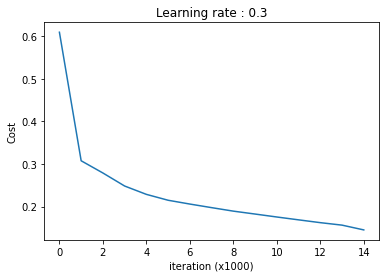

Accuracy (1st method) = 92.8909952606635
Accuracy (2nd method) =92.89099526066352 
Accuracy (1st method) = 93.0
Accuracy (2nd method) =93.0 


In [40]:
dropout_parameters, dropout_aL, dropout_cost = dropout_model(x_train, y_train)
_ = nn.predict(x_train, y_train, dropout_parameters)
_ = nn.predict(x_test, y_test, dropout_parameters)

In [52]:
def min_max_aL(data):
    stats = []
    for entry in data:
        stat = []
        stat.append(entry.min())
        stat.append(entry.max())
        stats.append(stat)

    stat_df = pd.DataFrame(stats)
    return stat_df

In [58]:
non_regularized_stats = min_max_aL(dropout_aL)
non_regularized_stats.head(16)

,0,1
0,0.129637,0.597329
1,0.000309,0.990870
2,0.000161,0.997282
3,0.000139,0.999474
4,0.000190,0.999879
5,0.000258,0.999976
6,0.000294,0.999993
7,0.000387,0.999998
8,0.000452,0.999999
9,0.000438,1.000000
